In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud


In [2]:
# Specify the input file
input_file = '../data/data_clustered.csv'

# Load the clustered data
df = pd.read_csv(input_file)

# Print the first 5 rows
df.head()

# save sample of data in a new csv file
df_sample = df.sample(n=1000)
df_sample.to_csv('../data/clustered_data_sample.csv', index=False)

In [3]:
# Convert string representation of list to actual list
df['categories_list'] = df['categories_list'].str.strip('[]').str.split(', ')

# Split categories_list into separate columns
categories_df = df['categories_list'].apply(pd.Series)

# Rename columns
max_columns = categories_df.shape[1]
categories_df.columns = [f'category_{i+1}' for i in range(max_columns)]

# Remove quotes from the columns
categories_df = categories_df.applymap(lambda x: x.strip("'") if isinstance(x, str) else x)

# Concatenate the original data with the new category columns
df = pd.concat([df, categories_df], axis=1)

# Display the updated data
df.head()

C:\Users\moham\AppData\Local\Temp\ipykernel_12908\103774510.py:5: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  categories_df = df['categories_list'].apply(pd.Series)
C:\Users\moham\AppData\Local\Temp\ipykernel_12908\103774510.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  categories_df = categories_df.applymap(lambda x: x.strip("'") if isinstance(x, str) else x)


update_date                                               text  \
0  2022-03-31  convergence discrete dipole approximation theo...   
1  2022-03-30  discrete dipole approximation overview develop...   
2  2021-10-15  mapping radius metric space every closed curve...   
3  2019-08-19  remnant evolution carbon oxygen white dwarf me...   
4  2019-08-19  cofibrations category frolicher space cofibrat...   

                         categories_list  num_categories  cluster  \
0  ['physics.optics', 'physics.comp-ph']               2        4   
1  ['physics.optics', 'physics.comp-ph']               2       10   
2                            ['math.MG']               1        2   
3                           ['astro-ph']               1        6   
4                            ['math.AT']               1        2   

       category_1       category_2 category_3 category_4 category_5  \
0  physics.optics  physics.comp-ph        NaN        NaN        NaN   
1  physics.optics  physics.comp-ph        NaN        NaN        NaN   
2         math.MG              NaN        NaN        NaN        NaN   
3        astro-ph              NaN        NaN        NaN        NaN   
4         math.AT              NaN        NaN        NaN        NaN   

  category_6 category_7 category_8 category_9 category_10 category_11  \
0        NaN        NaN        NaN        NaN         NaN         NaN   
1        NaN        NaN        NaN        NaN         NaN         NaN   
2        NaN        NaN        NaN        NaN         NaN         NaN   
3        NaN        NaN        NaN        NaN         NaN         NaN   
4        NaN        NaN        NaN        NaN         NaN         NaN   

  category_12 category_13  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN

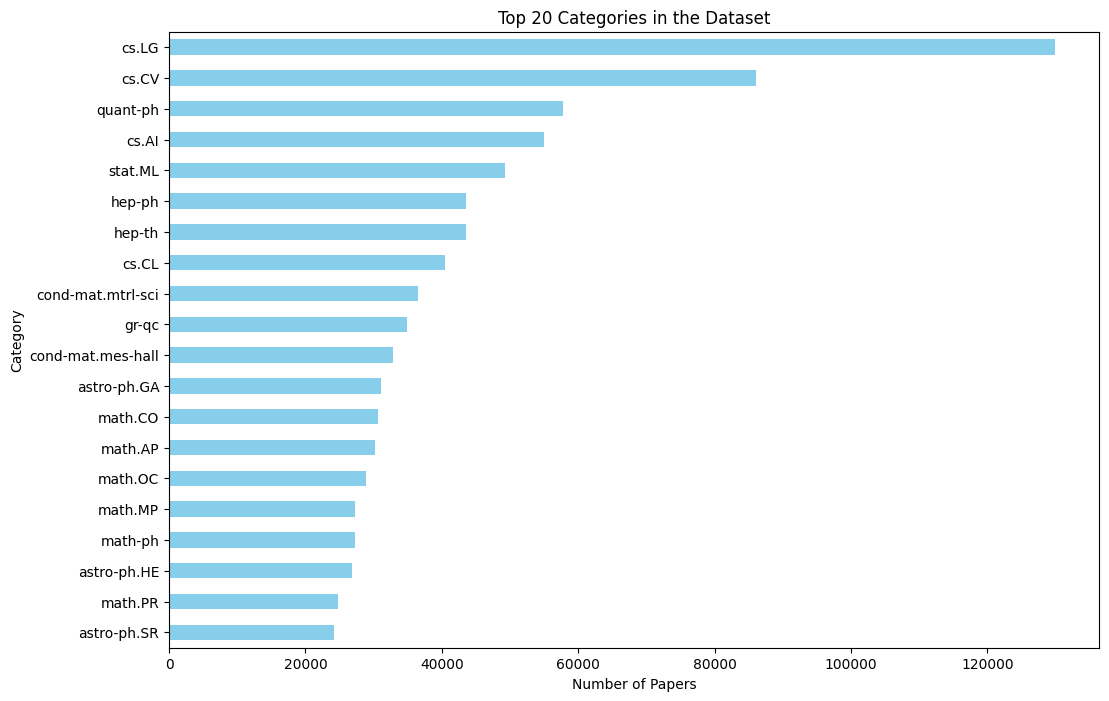

In [4]:
# Concatenate all category columns to form a single series
all_categories = pd.concat([df[f'category_{i+1}'] for i in range(13)]).dropna()

# Count the occurrences of each category
category_counts = all_categories.value_counts()

# Display the top 20 categories
top_categories = category_counts.head(20)

# Plotting the top 20 categories
plt.figure(figsize=(12, 8))
top_categories.plot(kind='barh', color='skyblue')
plt.title("Top 20 Categories in the Dataset")
plt.xlabel("Number of Papers")
plt.ylabel("Category")
plt.gca().invert_yaxis()
plt.show()

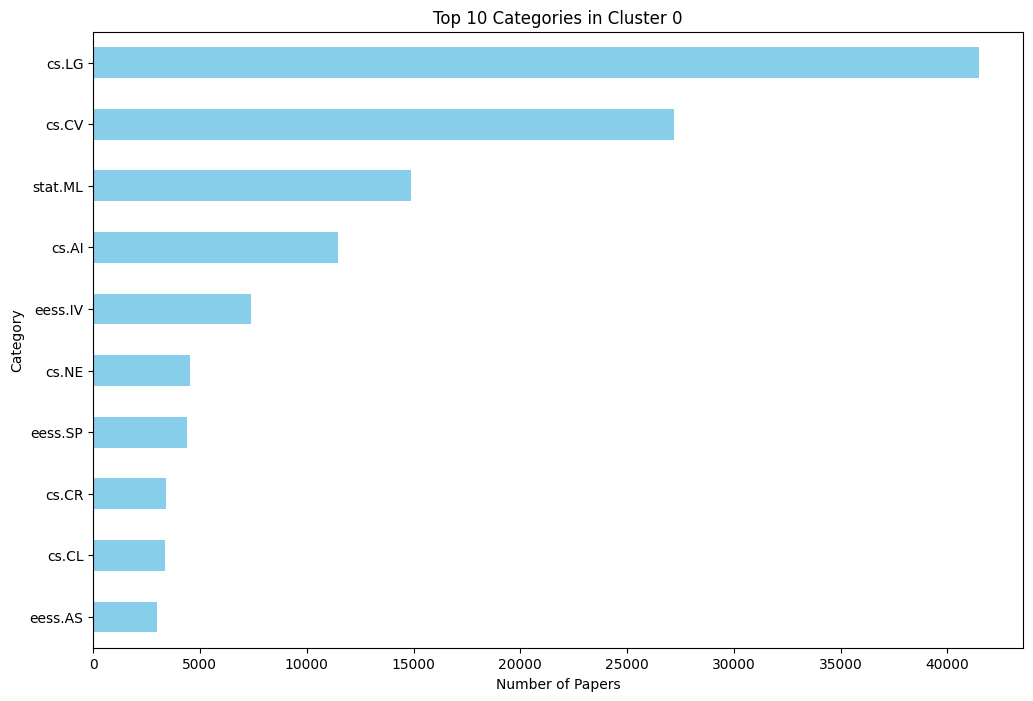

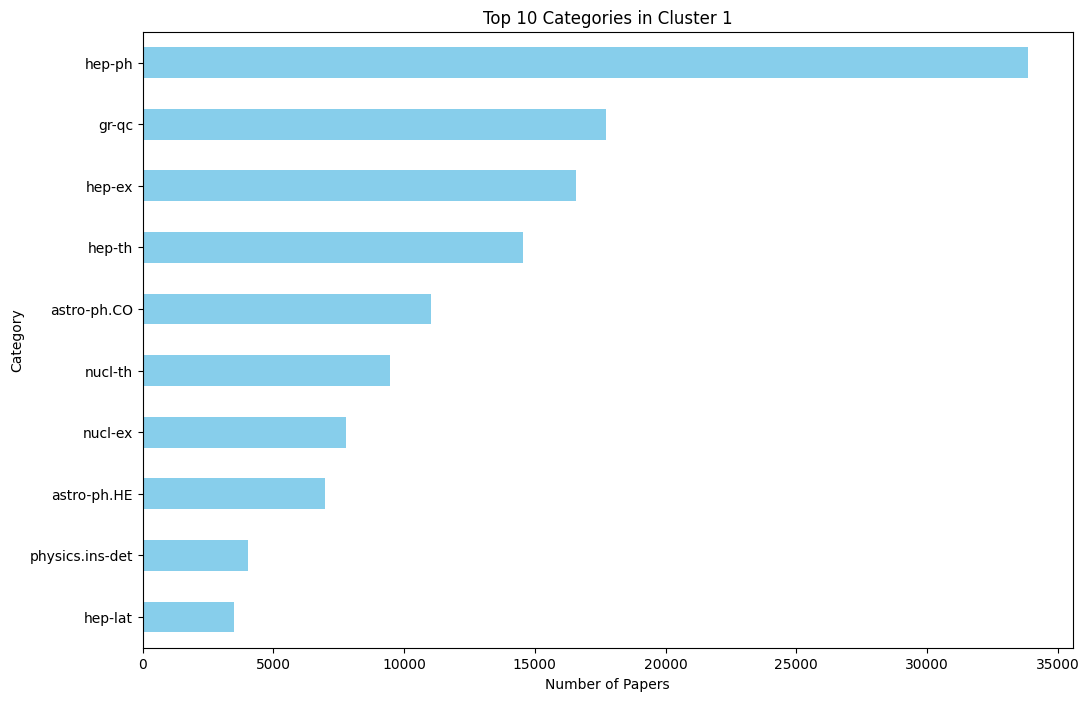

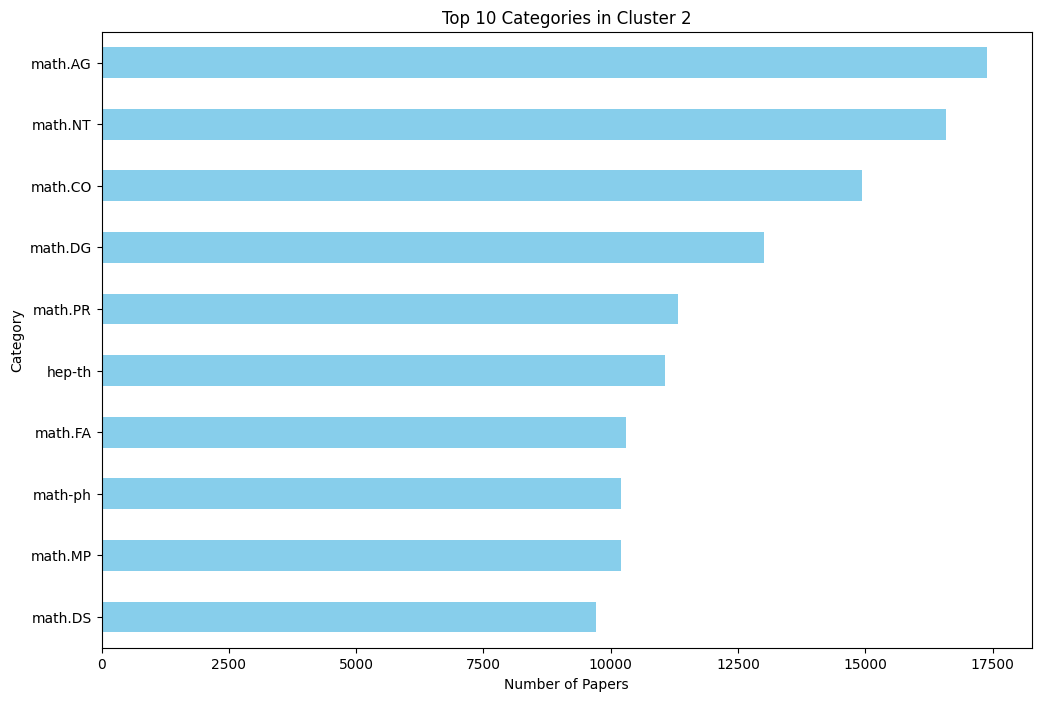

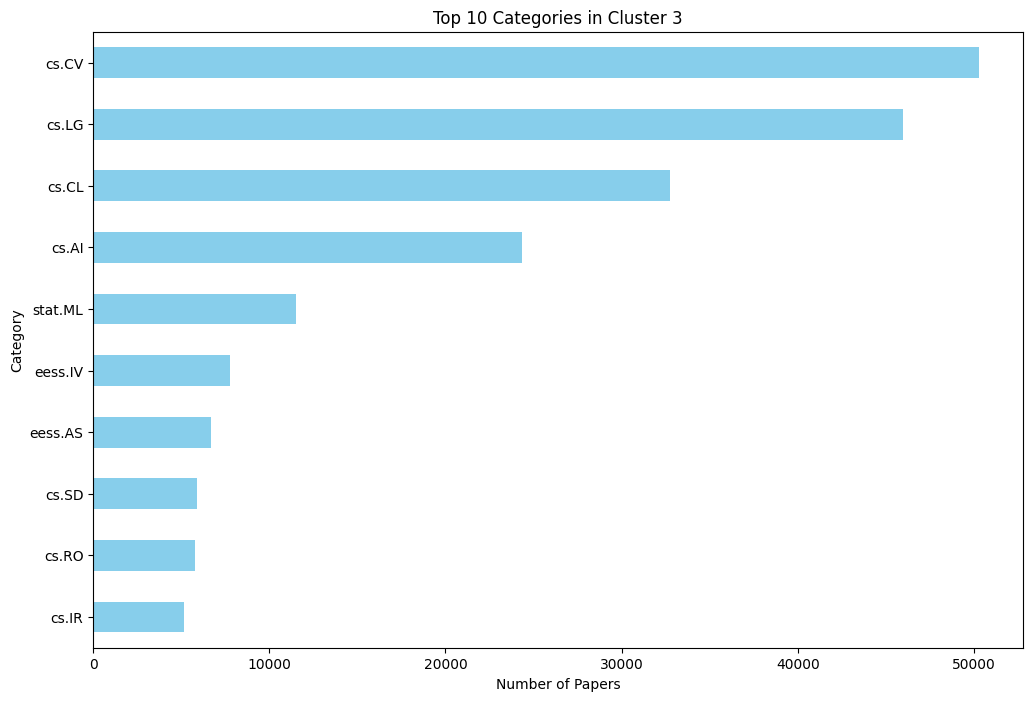

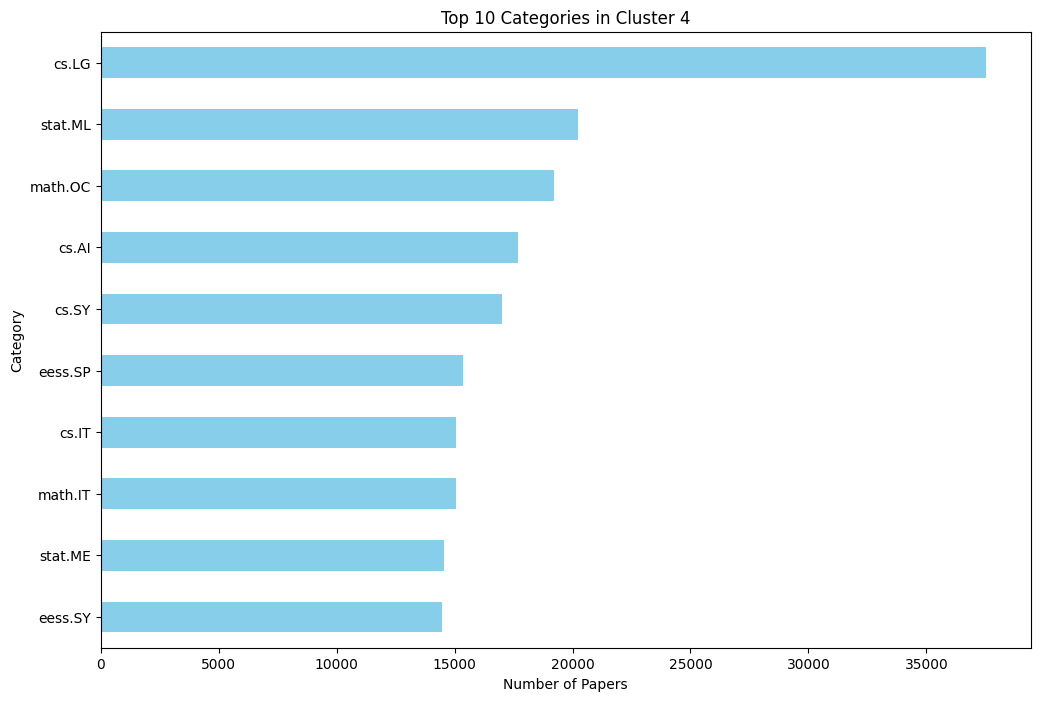

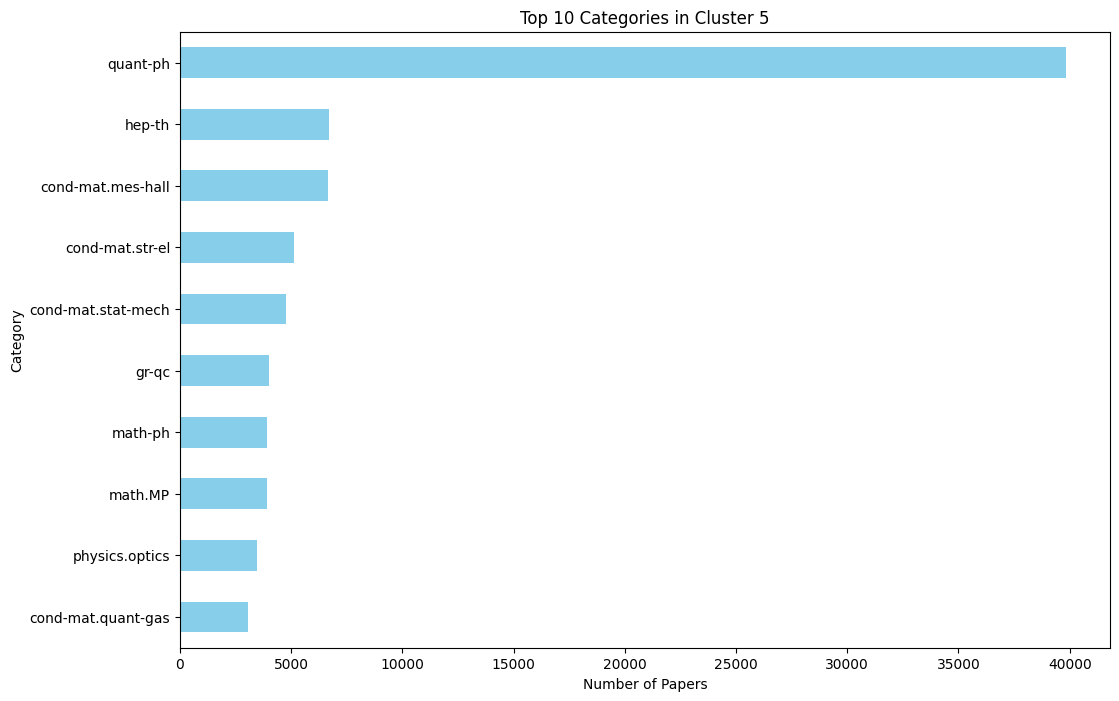

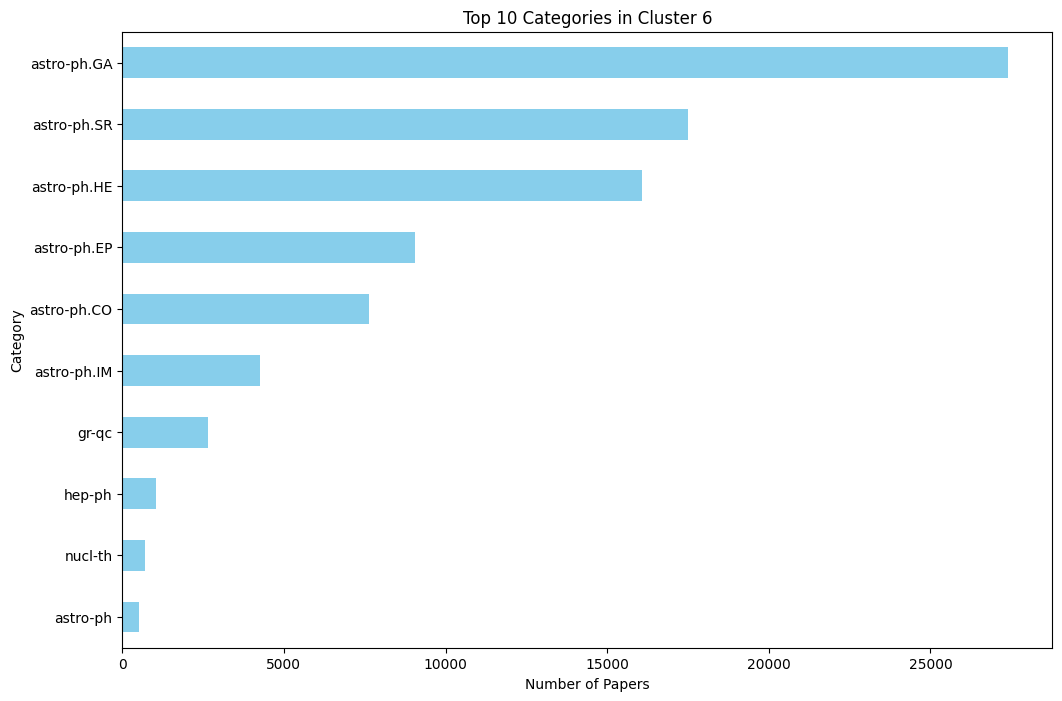

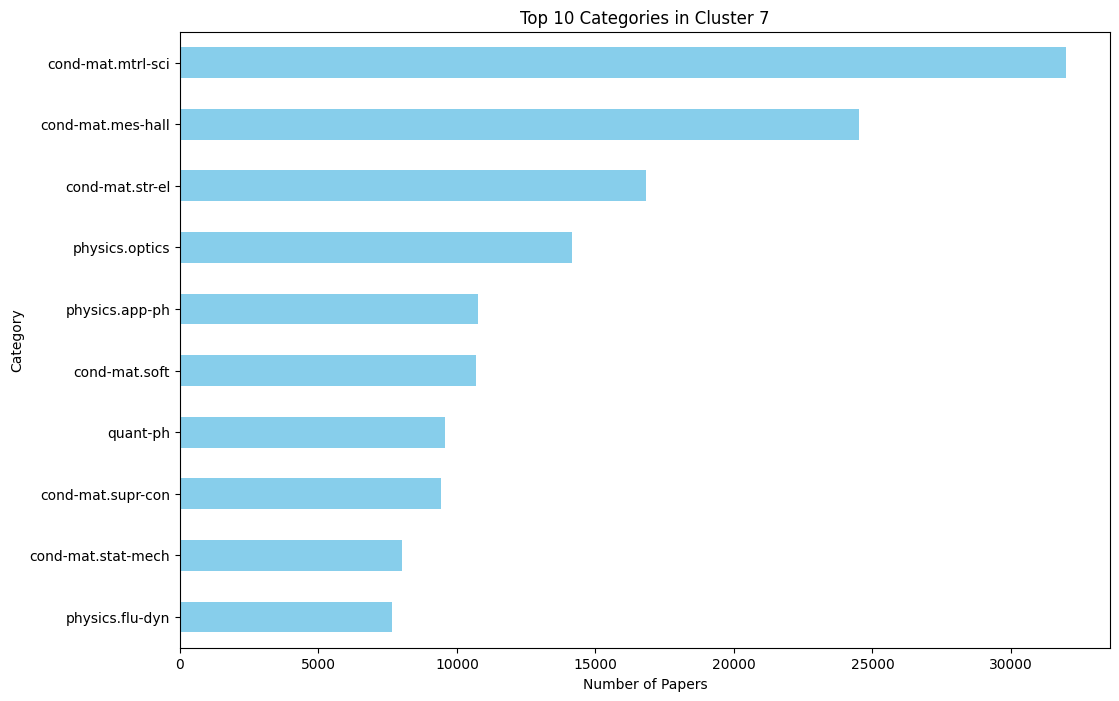

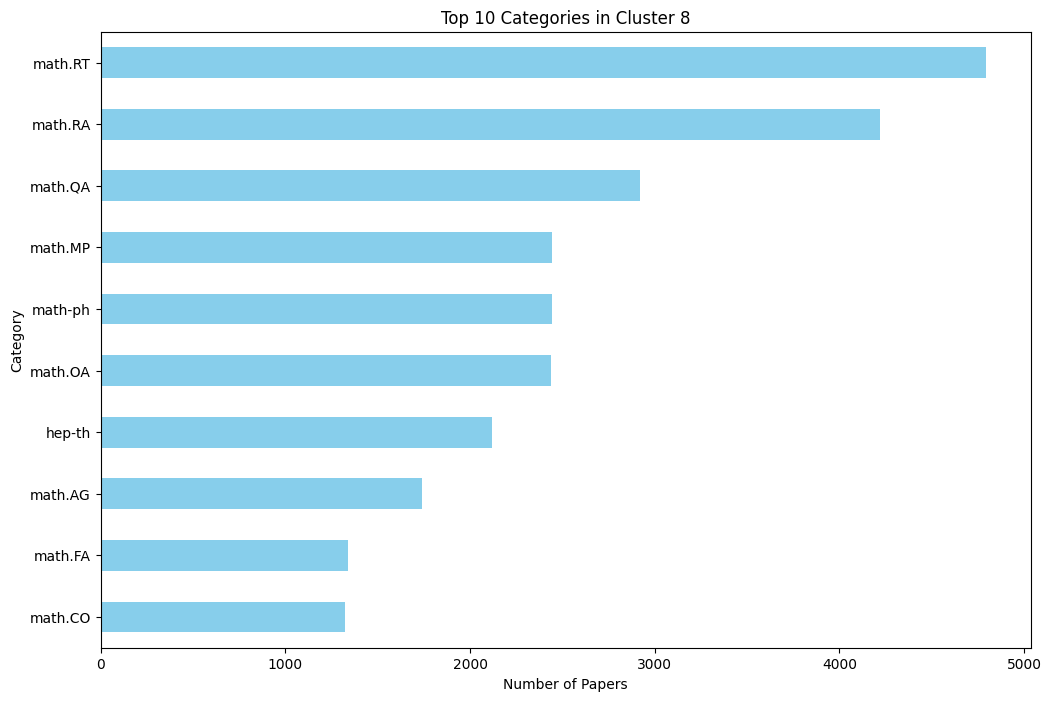

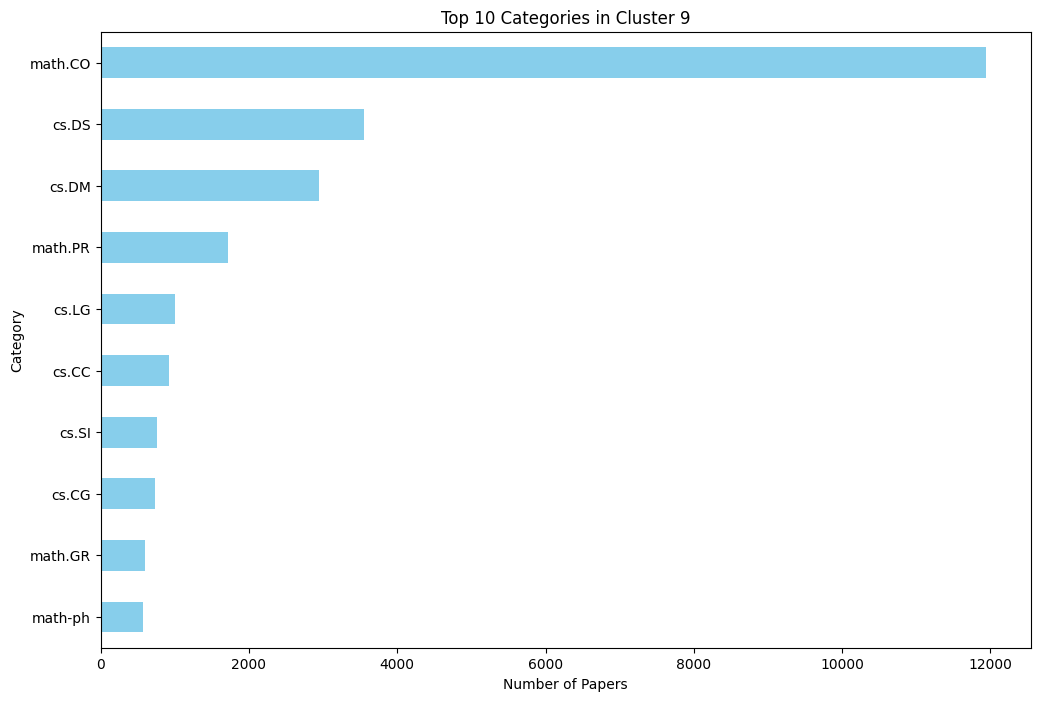

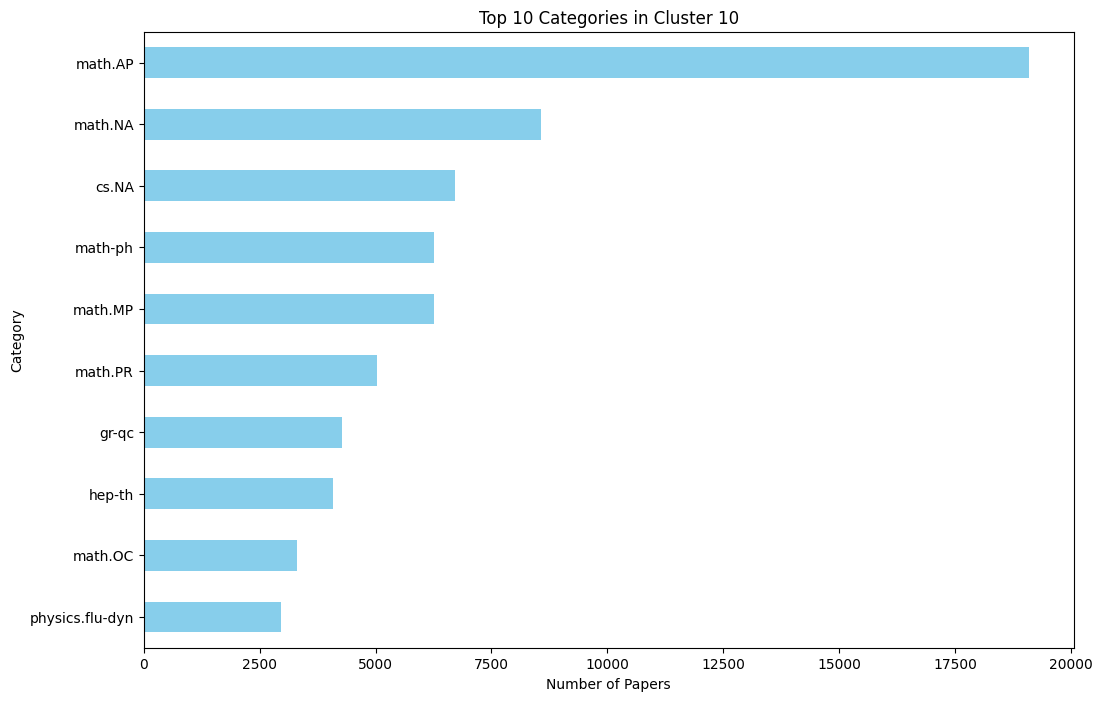

In [15]:
# print each cluster top categories
for i in range(11):
    cluster = df[df['cluster'] == i]
    cluster_categories = pd.concat([cluster[f'category_{i+1}'] for i in range(11)]).dropna()
    cluster_category_counts = cluster_categories.value_counts()
    cluster_top_categories = cluster_category_counts.head(10)
    plt.figure(figsize=(12, 8))
    cluster_top_categories.plot(kind='barh', color='skyblue')
    plt.title(f"Top 10 Categories in Cluster {i}")
    plt.xlabel("Number of Papers")
    plt.ylabel("Category")
    plt.gca().invert_yaxis()
    plt.show()

In [6]:
def get_top_terms_in_cluster(cluster_num, top_n=10):
    cluster_texts = df[df['cluster'] == cluster_num]['text']
    all_terms = ' '.join(cluster_texts).split()
    return Counter(all_terms).most_common(top_n)

for cluster_num in df['cluster'].unique():
    print(f"Cluster {cluster_num}: {get_top_terms_in_cluster(cluster_num)}")

Cluster 4: [('data', 197883), ('algorithm', 168203), ('result', 98982), ('analysis', 88221), ('system', 83018), ('network', 77337), ('learning', 75579), ('model', 73684), ('method', 73176), ('control', 69071)]
Cluster 10: [('equation', 136534), ('solution', 50898), ('space', 22919), ('differential', 22244), ('nonlinear', 20632), ('boundary', 20546), ('result', 20152), ('field', 20135), ('wave', 20002), ('linear', 17595)]
Cluster 2: [('space', 95323), ('mathbb', 74444), ('function', 45930), ('mathcal', 45335), ('result', 42521), ('class', 41817), ('field', 37650), ('polynomial', 34095), ('manifold', 34036), ('group', 32279)]
Cluster 6: [('star', 113093), ('galaxy', 92198), ('mass', 80498), ('ray', 44097), ('stellar', 43057), ('emission', 40276), ('observation', 38084), ('cluster', 35507), ('formation', 33571), ('data', 32724)]
Cluster 7: [('field', 112579), ('magnetic', 95490), ('spin', 84163), ('energy', 74040), ('temperature', 73632), ('electron', 59061), ('transition', 57844), ('mate

d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


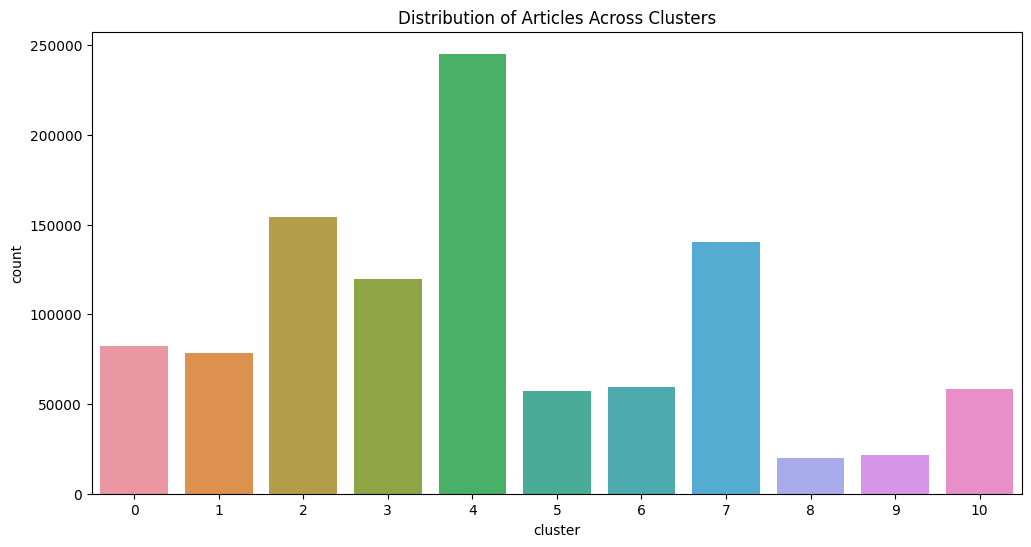

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='cluster')
plt.title('Distribution of Articles Across Clusters')
plt.show()

d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

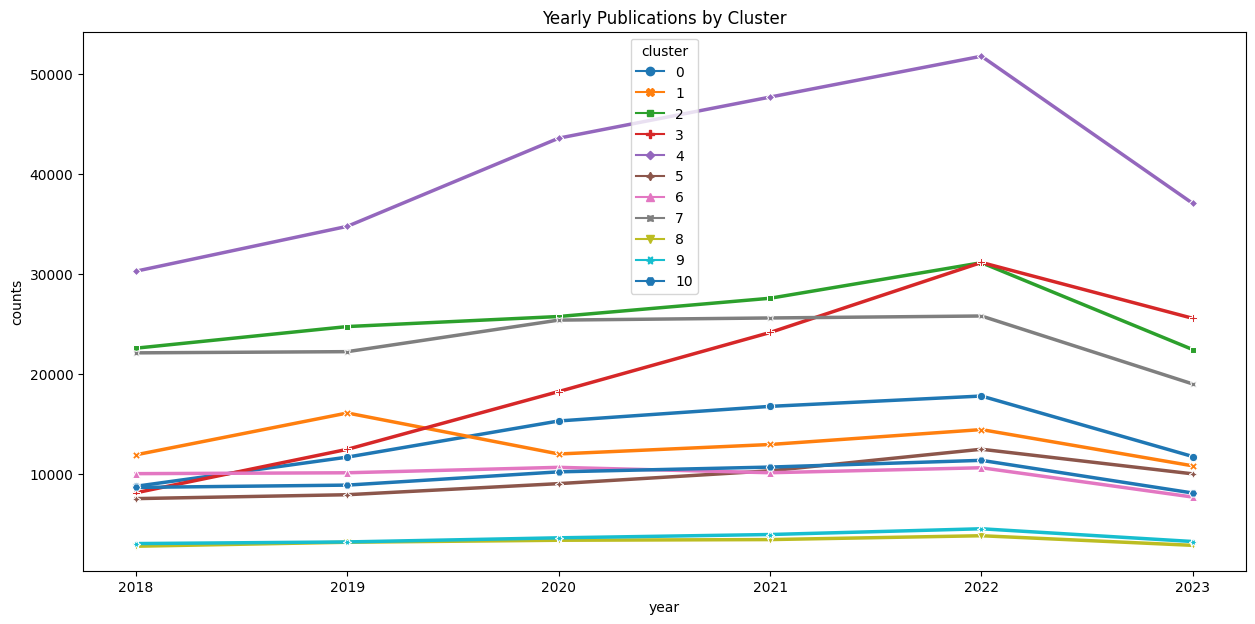

In [8]:
# Extract the year from the 'update_date' column
df['year'] = pd.to_datetime(df['update_date']).dt.year
cluster_popularity = df.groupby(['year', 'cluster']).size().reset_index(name='counts')
plt.figure(figsize=(15, 7))
sns.lineplot(data=cluster_popularity, x='year', y='counts', hue='cluster', palette='tab10', linewidth=2.5, style='cluster', markers=True, dashes=False)
plt.title('Yearly Publications by Cluster')
plt.show()

d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

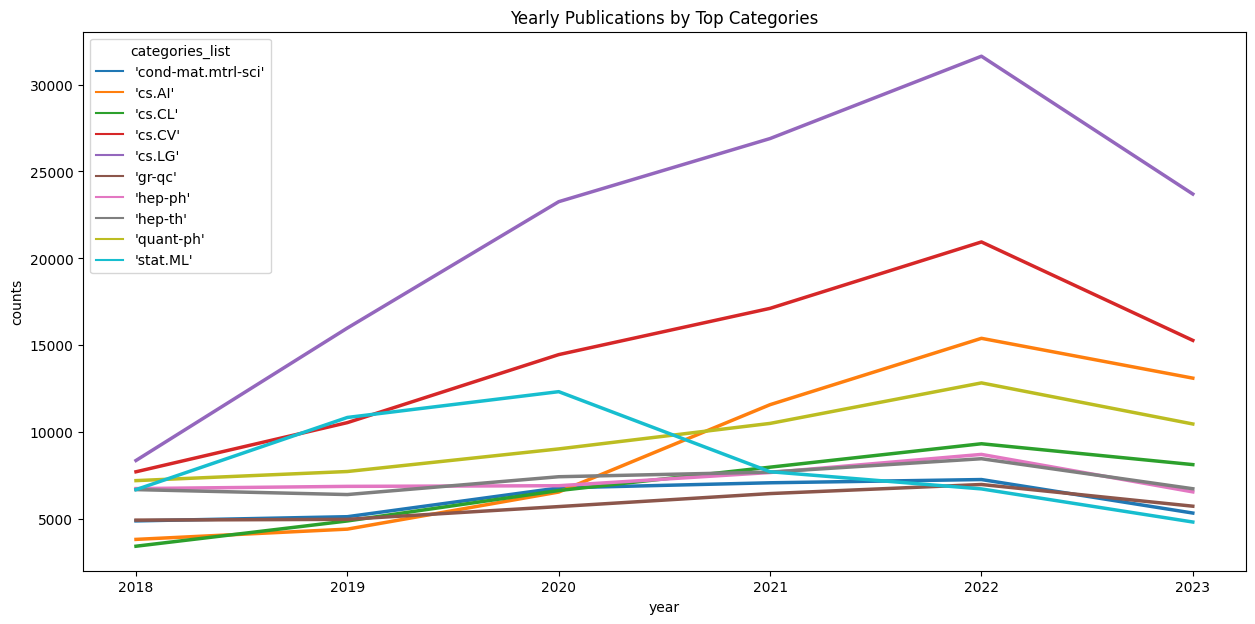

In [9]:
# Split the categories and explode the DataFrame to have one category per row
df_categories = df.assign(categories=df['categories_list'].str.split(' ')).explode('categories_list')

# Group by year and category, then count the number of articles
category_yearly_counts = df_categories.groupby(['year', 'categories_list']).size().reset_index(name='counts')

# Plot the top N categories
N = 10
top_categories = category_yearly_counts.groupby('categories_list')['counts'].sum().nlargest(N).index
filtered_counts = category_yearly_counts[category_yearly_counts['categories_list'].isin(top_categories)]

plt.figure(figsize=(15, 7))
sns.lineplot(data=filtered_counts, x='year', y='counts', hue='categories_list', palette='tab10', linewidth=2.5)
plt.title('Yearly Publications by Top Categories')
plt.show()


        count
month        
1       86159
2       86557
3      100709
4       92510
5      102794
6      105197
7       81605
8       78115
9       74241
10      80683
11      75383
12      73150


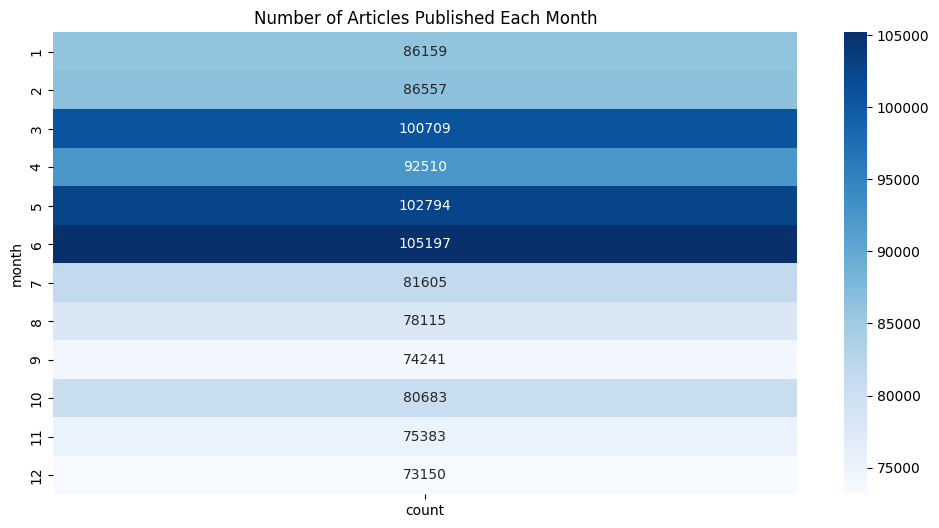

In [10]:
# Analyze the distribution of articles by month and plot them in a heatmap without considering the year
df['month'] = pd.to_datetime(df['update_date']).dt.month
month_counts = df['month'].value_counts().sort_index()
# Convert the series to a dataframe
month_counts = month_counts.to_frame()
month_counts.columns = ['count']
print(month_counts)

# show the distribution of articles by month in a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(month_counts, annot=True, fmt='g', cmap='Blues')
plt.title('Number of Articles Published Each Month')
plt.savefig('../images/num_articles_each_month.png')
plt.show()


d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

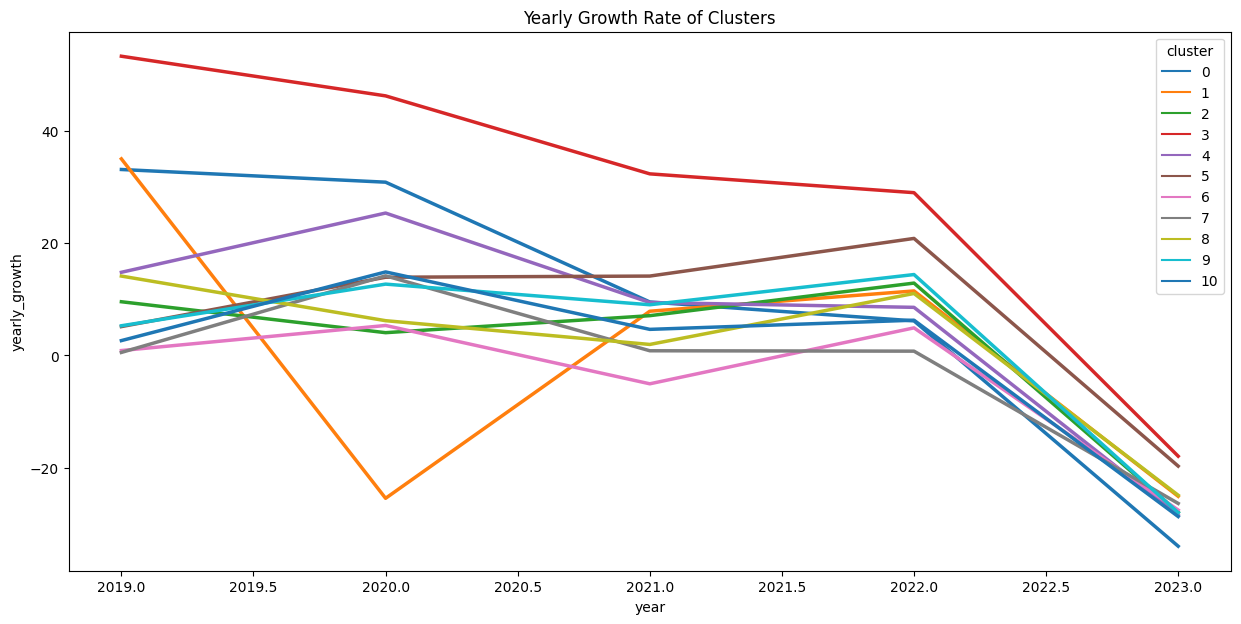

In [11]:
# Calculate the year-on-year growth for each cluster
cluster_popularity['yearly_growth'] = cluster_popularity.groupby('cluster')['counts'].pct_change() * 100


plt.figure(figsize=(15, 7))
sns.lineplot(data=cluster_popularity, x='year', y='yearly_growth', hue='cluster', palette='tab10', linewidth=2.5)
plt.title('Yearly Growth Rate of Clusters')
plt.show()

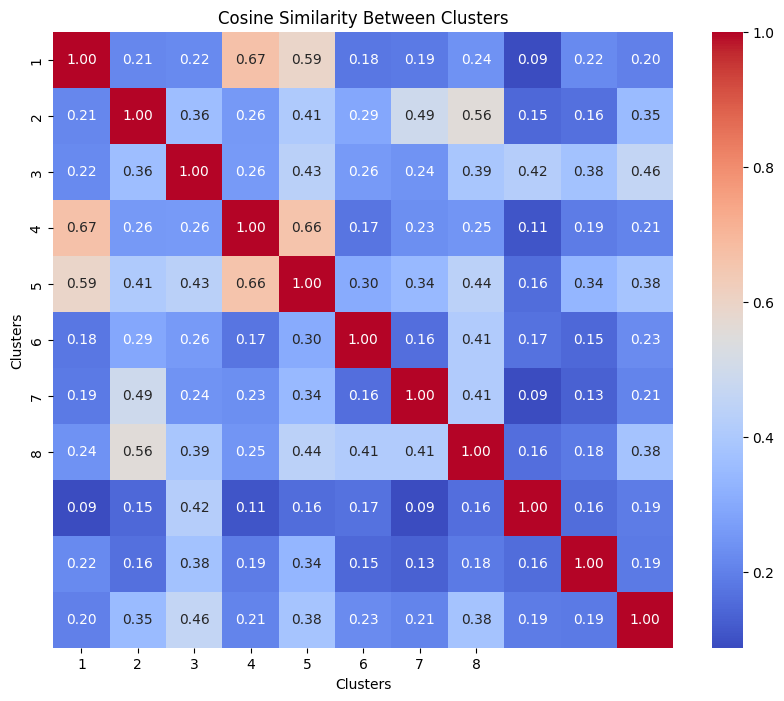

In [12]:
# Combine all texts in each cluster
cluster_texts = df.groupby('cluster')['text'].apply(' '.join)

# Compute TF-IDF vectors for each cluster's combined texts
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(cluster_texts)

# Compute cosine similarity between clusters
similarity_matrix = cosine_similarity(tfidf_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=['1','2','3','4','5','6','7','8'], yticklabels=['1','2','3','4','5','6','7','8'])
plt.title('Cosine Similarity Between Clusters')
plt.xlabel('Clusters')
plt.ylabel('Clusters')
plt.show()


<Figure size 1400x900 with 0 Axes>

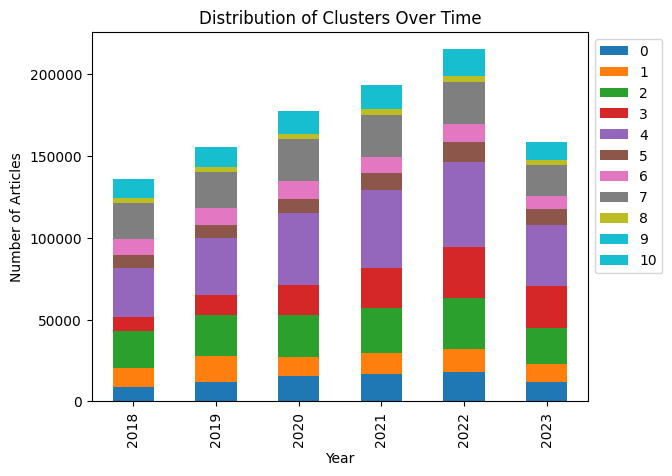

In [24]:
# Extract the year from the 'update_date' column
df['year'] = pd.to_datetime(df['update_date']).dt.year

# Analyze the distribution of articles over time
year_counts = df['year'].value_counts().sort_index()

# Analyze the distribution of clusters over time
cluster_year_counts = df.groupby('year')['cluster'].value_counts()

# Plot the distribution of clusters in each year as a stacked bar chart
plt.figure(figsize=(14, 9))
cluster_year_counts.unstack().plot(kind='bar', stacked=True, colormap='tab10')
plt.title('Distribution of Clusters Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.savefig('../images/distribution_clusters_articles_over_time.png')
plt.show()


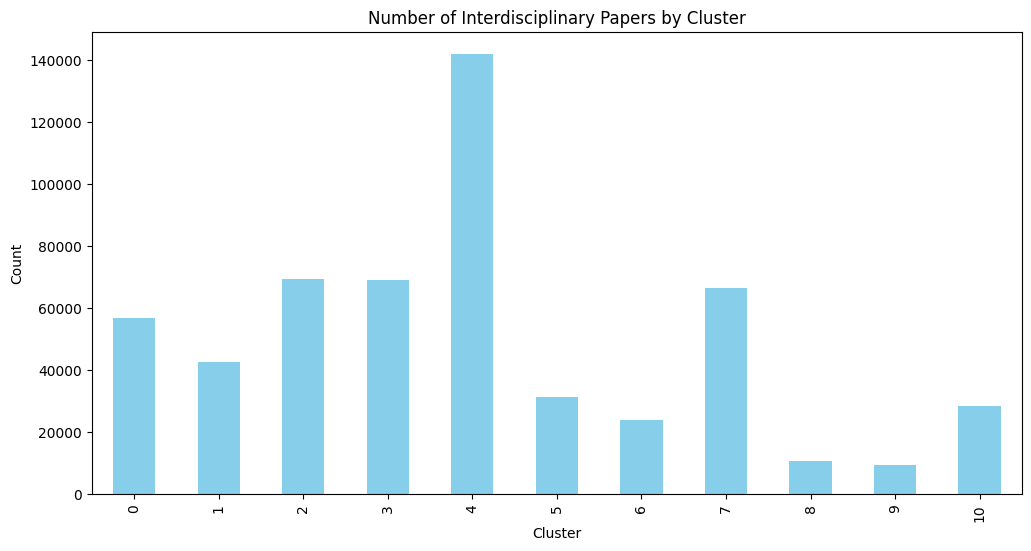

In [14]:
# Papers with more than one category can be considered interdisciplinary
interdisciplinary_papers = df[df['num_categories'] > 1]

# Count interdisciplinary papers in each cluster
interdisciplinary_counts = interdisciplinary_papers['cluster'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
interdisciplinary_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Interdisciplinary Papers by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

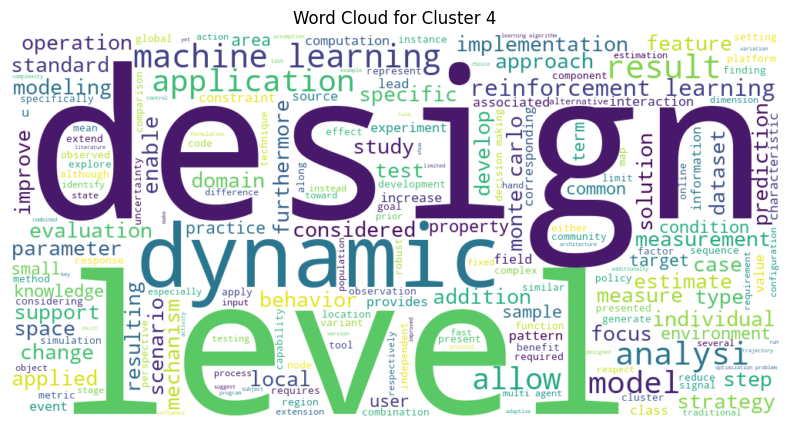

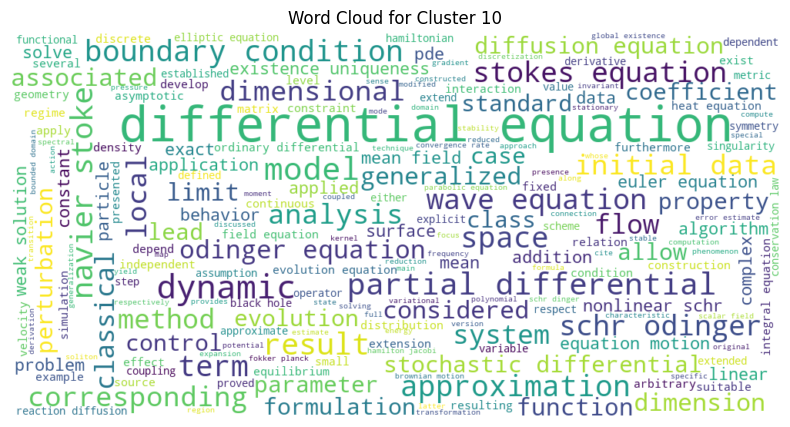

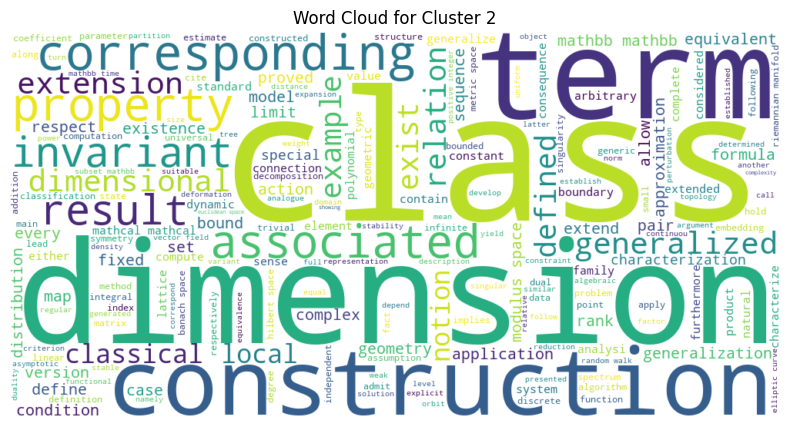

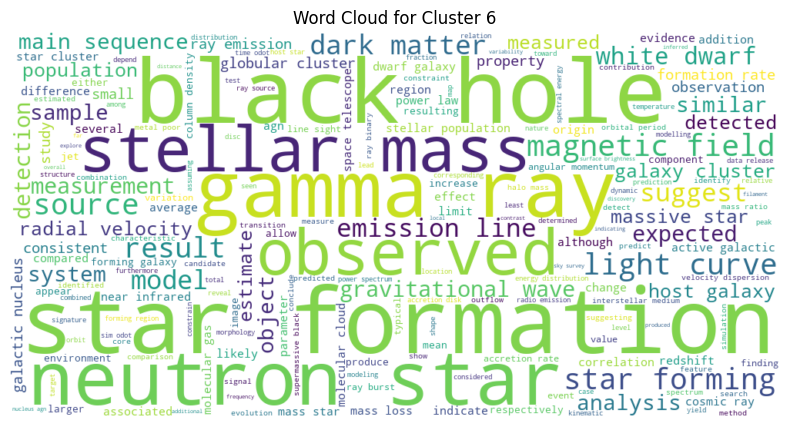

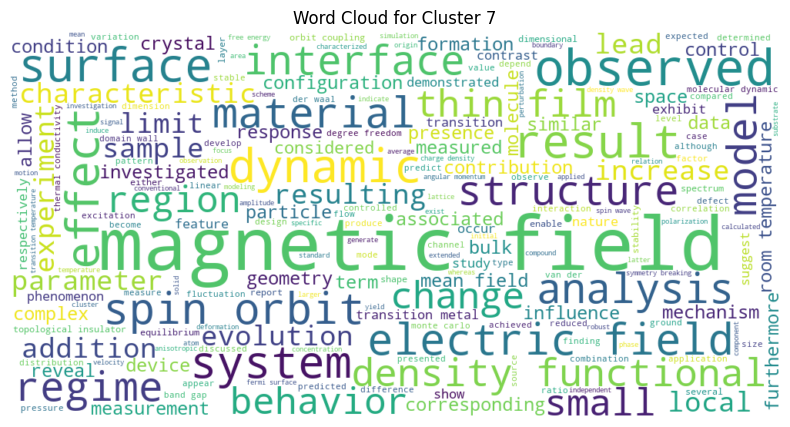

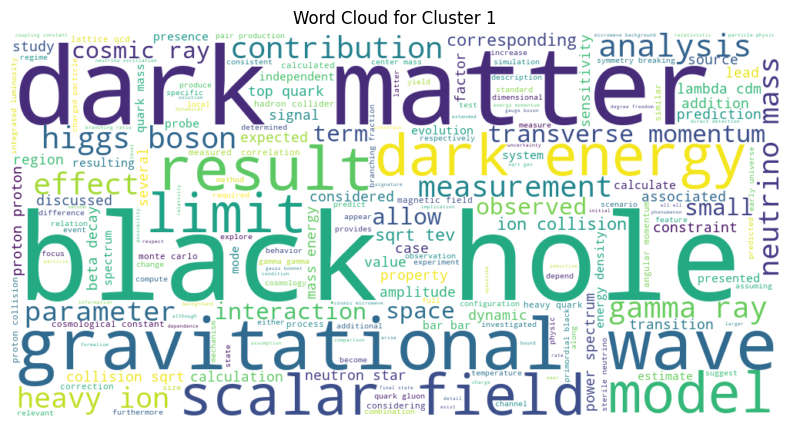

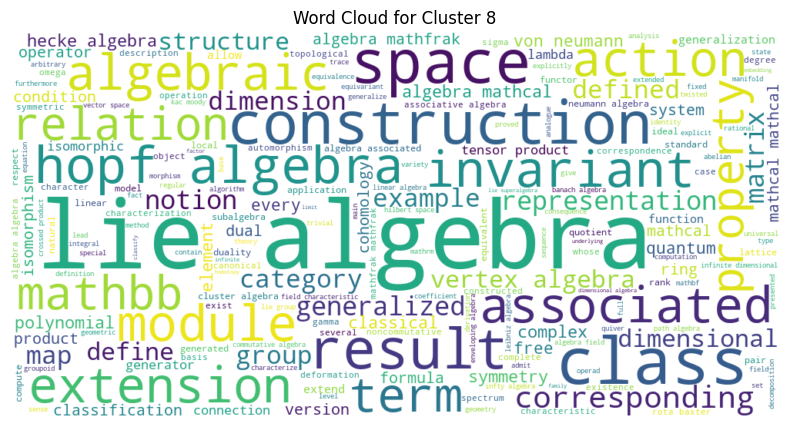

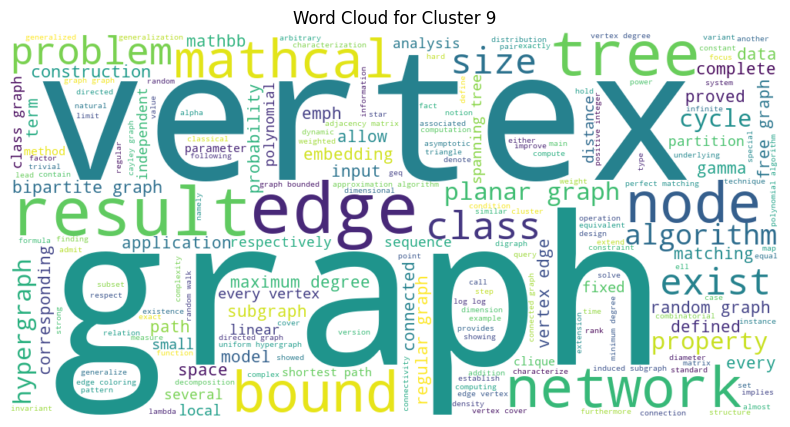

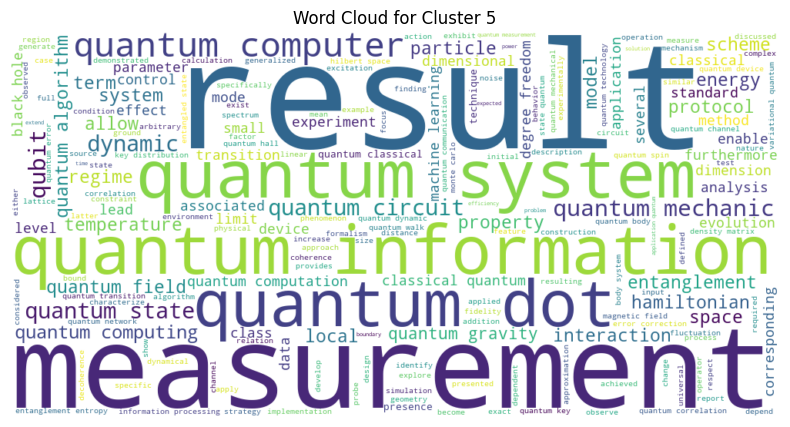

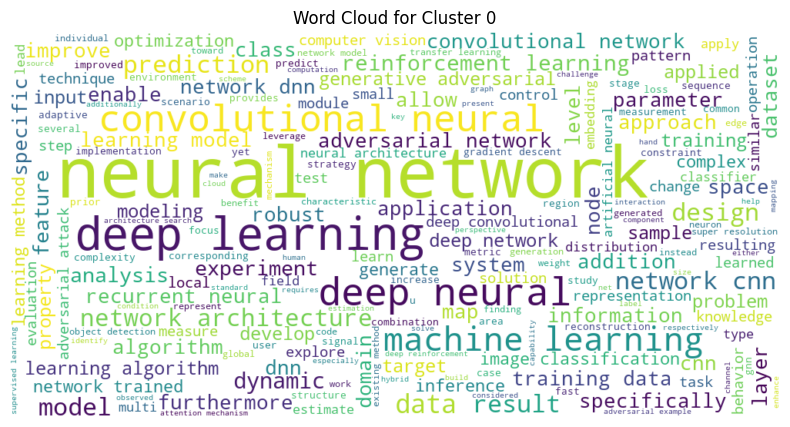

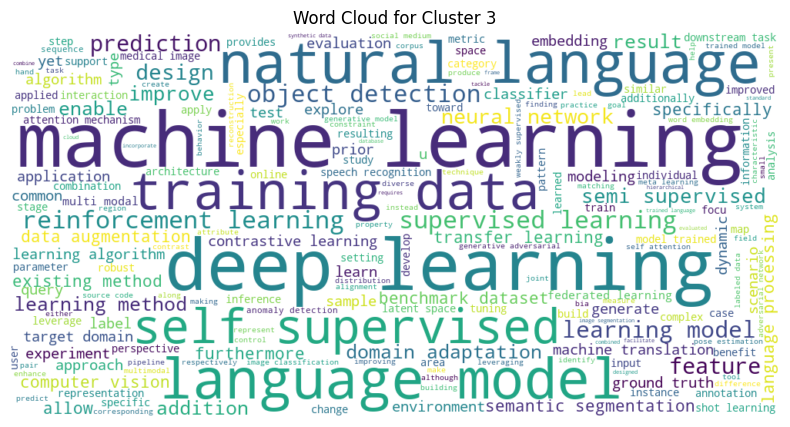

In [26]:
for cluster_num in df['cluster'].unique():
    cluster_text = ' '.join(df[df['cluster'] == cluster_num]['text'])
    wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(cluster_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster_num}')
    plt.show()
